In [5]:
### https://github.com/josepmariasiso/Projecte-Machine-Learning/sprint5.1.ipynb


# Importar Llibreries Necessàries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install sweetviz
#import sweetviz as sv

# Carregar el Dataset
df = pd.read_csv('https://raw.githubusercontent.com/ITACADEMYprojectes/projecteML/e8d1aab0a24ddf55af9dfd9e83b1ea79e34c1af9/bank_dataset.CSV')

In [18]:
#Mostrar les primeres files del dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [16]:
#Mostrar les darreres files del dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34.0,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
#Info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [8]:
#Descripcio estadistica
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


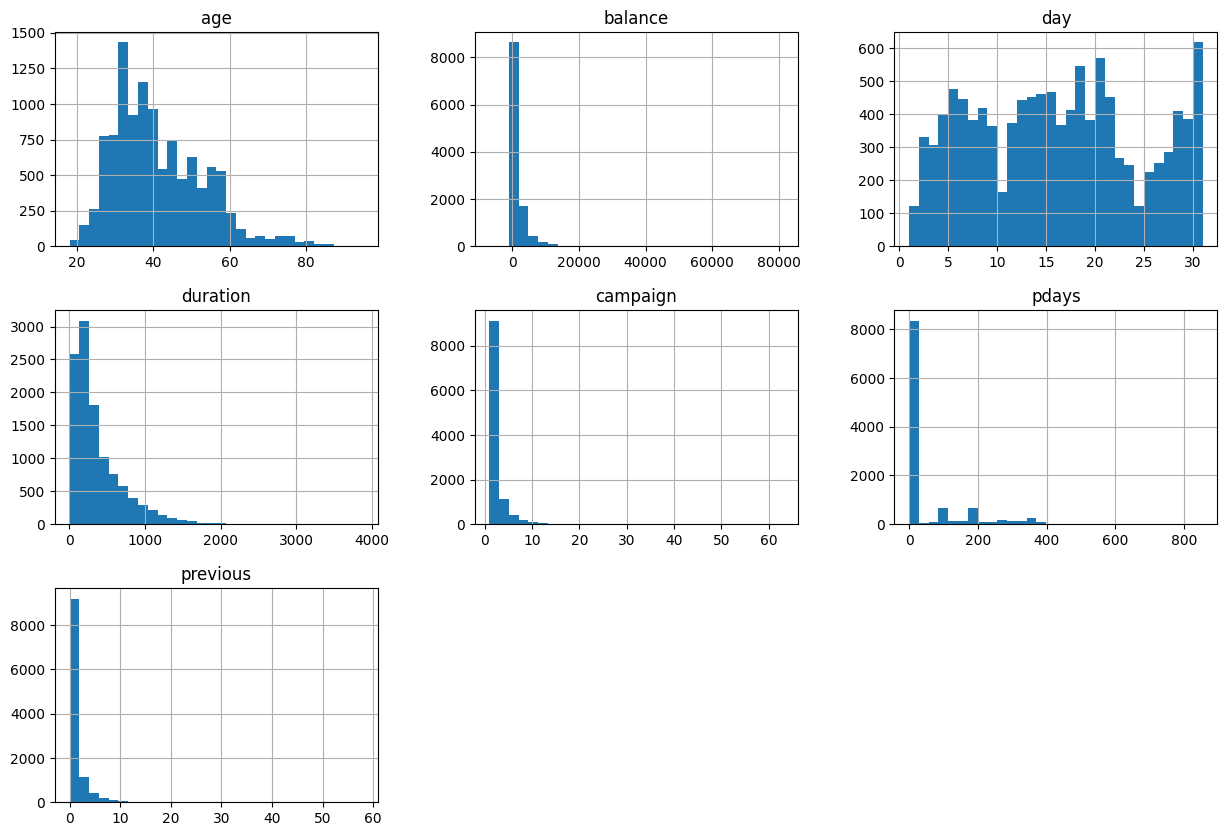

In [51]:
#Histograma
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [19]:
#comptar valors de cada variable categorica
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

In [42]:
# Comptar valors nuls per columna
df.isnull().sum()

,0
age,10
job,0
marital,5
education,7
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [37]:
# Registres sense la dada AGE
df[df["age"].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,NaN,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,NaN,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,NaN,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,NaN,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,NaN,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,NaN,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


In [38]:
# Registres sense la dada MARITAL
df[df["marital"].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
6701,60.0,admin.,NaN,primary,no,-444,no,yes,cellular,16,jul,227,1,-1,0,unknown,no
9272,30.0,blue-collar,NaN,primary,no,35,yes,no,cellular,11,jul,366,2,-1,0,unknown,no


In [43]:
# Registres sense la dad EDUCATION
df[df["education"].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1300,37.0,technician,married,NaN,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
2943,24.0,student,single,NaN,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
4737,37.0,management,single,NaN,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
6819,32.0,services,married,NaN,no,-344,no,yes,cellular,4,feb,44,1,-1,0,unknown,no
7121,57.0,entrepreneur,married,NaN,no,657,no,no,unknown,12,jun,344,1,-1,0,unknown,no
8592,55.0,management,single,NaN,no,797,no,no,cellular,29,jul,24,2,-1,0,unknown,no
9406,32.0,technician,single,NaN,no,696,no,yes,cellular,13,aug,101,4,105,4,failure,no


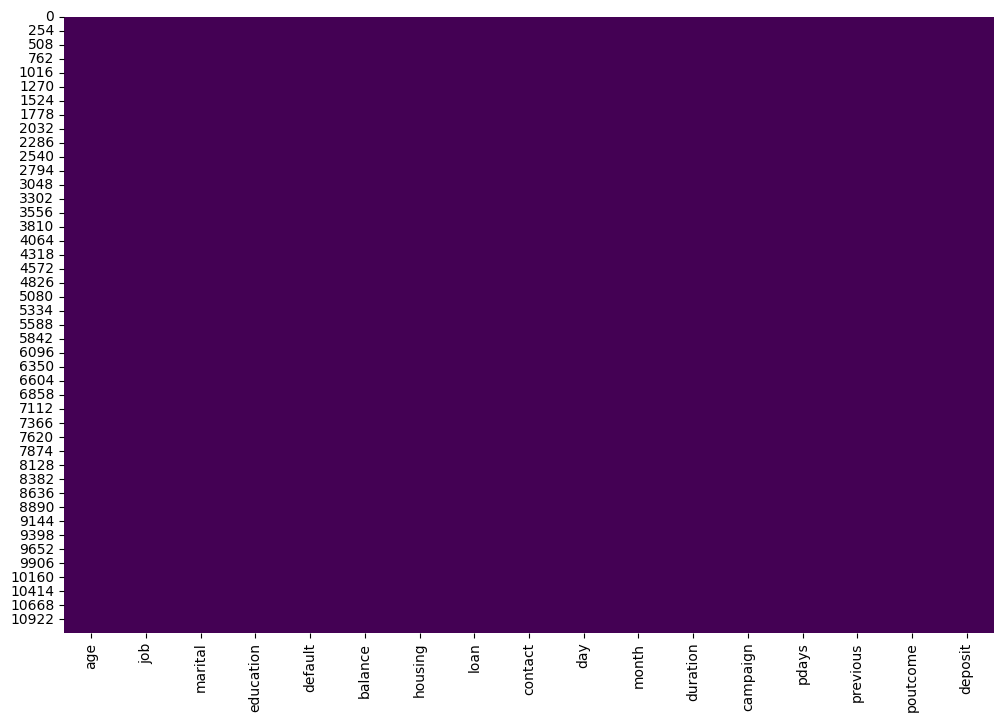

In [20]:
# Valors nuls en un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

## Com tractem el valors nuls?
degut a que estem parlant de 22 registres amb valors nuls sobre un conjunt de 11.162 registres (son irreconeixibles en el mapa de color) la decisio es la de eliminar els registres amb valors nuls per a no distorsionar el resultat final.

In [49]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11140 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11140 non-null  float64
 1   job        11140 non-null  object 
 2   marital    11140 non-null  object 
 3   education  11140 non-null  object 
 4   default    11140 non-null  object 
 5   balance    11140 non-null  int64  
 6   housing    11140 non-null  object 
 7   loan       11140 non-null  object 
 8   contact    11140 non-null  object 
 9   day        11140 non-null  int64  
 10  month      11140 non-null  object 
 11  duration   11140 non-null  int64  
 12  campaign   11140 non-null  int64  
 13  pdays      11140 non-null  int64  
 14  previous   11140 non-null  int64  
 15  poutcome   11140 non-null  object 
 16  deposit    11140 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.5+ MB


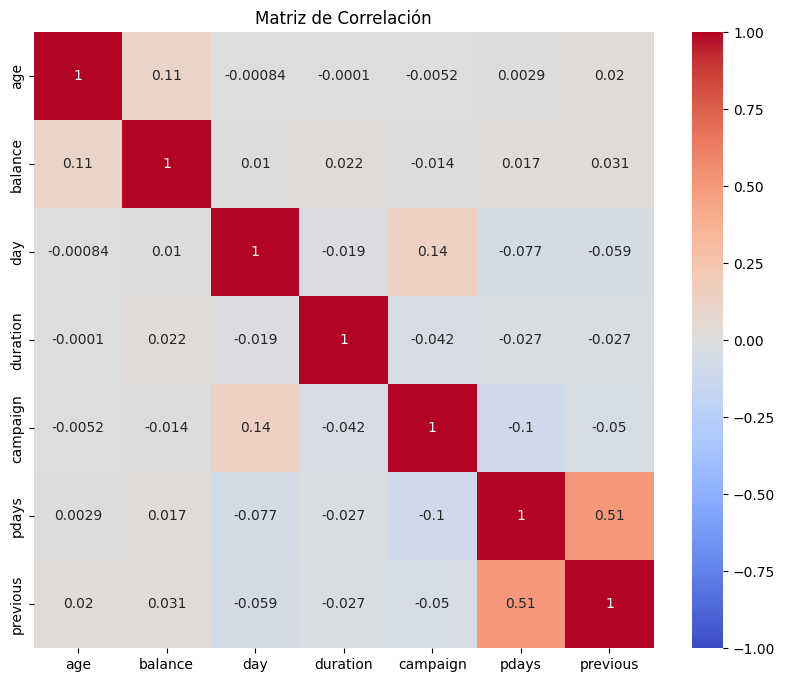

In [50]:
# Calcular la matriu de correlació només amb les variables numèriques
correlation = df.corr(numeric_only=True)

# Visualitzar la matriu de correlació amb un mapa de calor

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

## Interpretació del Valor de Pearson

# Rang de valors:
#- (-1): Correlació negativa perfecta. Quan una variable augmenta, l'altra disminueix proporcionalment.
#- 0: Sense correlació lineal. No hi ha una relació lineal entre les variables, tot i que poden tenir una relació no lineal.
#- 1: Correlació positiva perfecta. Quan una variable augmenta, l'altra també augmenta proporcionalment.

## Adreça de la Correlació:

#- Valors positius: Indiquen una relació lineal positiva. A mesura que augmenta una variable, l'altra tendeix a augmentar.
#- Valors negatius: Indiquen una relació lineal negativa. A mesura que augmenta una variable, l'altra tendeix a disminuir.

## Correlacio de dades
A priori, les dates numeriques no tenen cap correlacio. La correlacio mes forta es entre "pdays" i "previous" que pot ser causada perque als no contactats anteriorment se'ls hi assigna un -1.

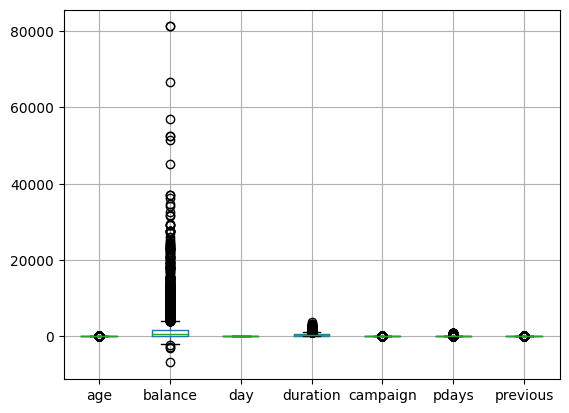

In [59]:
#Histograma
df.boxplot()
plt.show()

## Outliers

Sembla que la variable que mes pot contenit outliers es la de balance. Veguem com podem tractar-la...

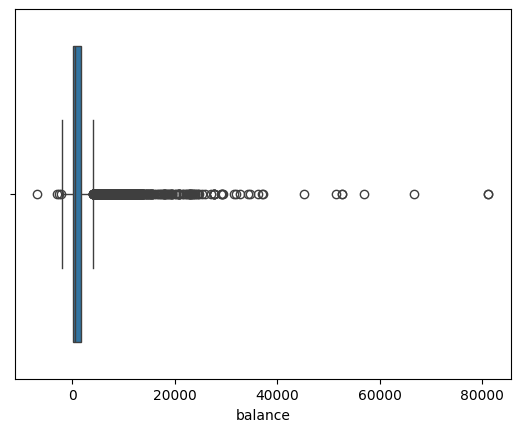

In [60]:
g = sns.boxplot(data = df, x = 'balance')

Number of outliers: 10215


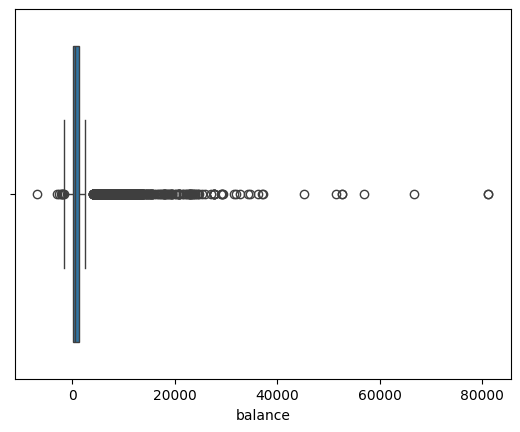

In [68]:
# Tractament dels Outliers
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

# Rang interquartil·lic
iqr = Q3 - Q1

# limit superior i inferior
upper = Q3 + (1.5*iqr)
lower = Q1 + (1.5*iqr)

# Subset de outliers
outliers = df[(df['balance'] < lower) | (df['balance'] > upper)]
g = sns.boxplot(data = outliers, x = 'balance')
print(f'Number of outliers: {len(outliers)}')

segons aixo hi ha 10.215 valors fora de rang, el que en indica que tot i la dispersio es una varable prou fiable per mantenirla sense canvis